
#Descente de gradient

Aujourd'hui nous allons considérer un modèle linéaire avec deux entrées et une sortie binaire. Dans un premier temps, nous allons dériver a la main les équations de l'algorithme de la descente de gradient pour trois fonctions de cout différentes. Puis nous implémenterons deux de ces algorithmes d'apprentissage dans le cadre de la classification de la base de donnée iris.

Le modèle linéaire s'écrit $f(x) = x_1 * w_1 + x_2 * w_2 + b$. Pour une étiquette $y$ ($y=0$ ou $y=1$), le cout est noté $E(f(x), y)$.

Les trois fonctions de cout considerées sont les suivantes:

1) $E(f(x), y) = - I_{f(x) * y < 0} f(x) * y$

2) l'erreur quadratique $E(f(x), y) = \frac{1}{2} (f(x) - y)^2$

3) la cross-entropy sigmoide $E(f(x), y) = - y \ln (sigm(f(x))) - (1-y) \ln (1-sigm(f(x))$ ou $sigm$ est la fonction sigmoide $sigm(x) = \frac{1}{1+e^{-x}}$.

##1. Dérivations

Dérivez a la main les équations de mise à jour par la descente de gradient des paramètes $w_1$, $w_2$ et $b$ pour chacun des trois couts. Que reconnaissez-vous pour le cout 1)? 

### correction

On va utiliser la règle de dérivation en chaine qui donne pour chacun des paramètres $\theta$ ($\theta \in \{w_1, w_2, b\}$):
$\frac{\partial E}{\partial \theta} = \frac{\partial E}{\partial f}\frac{\partial f}{\partial \theta}$

Tout d'abord on va calculer les dérivées partielles de f par rapport aux paramètres, qui seront utilisées pour les 3 cas :

$\frac{\partial f}{\partial b} = 1$

$\frac{\partial f}{\partial w_i} = x_i$ (pour $i=1$ ou $i=2$)

1) $E(f(x), y) = - I_{f(x) * y < 0} \big( f(x) * y \big)$

Cela donne $0$ dans le cas où la fonction indicatrice retourne 0, et sinon $f * y$. Donc pour la dérivée partielle $\frac{\partial E}{\partial f} = \frac{\partial}{\partial f}\big( -f * y \big) = -y$ si $f * y < 0$, sinon $\frac{\partial E}{\partial f} = 0$, ce que l'on note au final:

$$\frac{\partial E}{\partial f} = I_{f * y < 0} \big( -y \big)$$

On obtient:

$\frac{\partial E}{\partial w_i} = x_i I_{f * y < 0} \big( -y \big)$ et $\frac{\partial E}{\partial b} = I_{f * y < 0} \big( -y \big)$

=> On retrouve la formule de mise à jour des paramètres du perceptron

2) Erreur quadratique $E(f(x), y) = \frac{1}{2} (f(x) - y)^2$

$\frac{\partial E}{\partial f} = (f - y)$ (le $2$ s'annule avec le $\frac{1}{2}$)

On obtient:

$\frac{\partial E}{\partial w_i} = x_i (f(x) - y)$ et
$\frac{\partial E}{\partial b} = f(x) - y$

3) Cross-entropie sigmoide $E(f(x), y) = - y \ln (sigm(f(x))) - (1-y) \ln (1-sigm(f(x))$

On va noter $p(f) = sigm(f)$ ce qui permet de calculer $\frac{\partial p}{\partial f} = sigm(f) ( 1 - sigm(f) ) = p(1-p)$ (c'est tout simplement la dérivée de la sigmoide).

Maintenant on calcule la deuxième étape:

$$\frac{\partial E}{\partial p} = \frac{\partial}{\partial p} \big( - y \ln (p) - (1-y) \ln (1-p) \big)$$
$$\frac{\partial E}{\partial p} = -y \frac{1}{p} - (-1) (1 - y) \frac{1}{1-p}$$
$$\frac{\partial E}{\partial p} = \frac{-y (1 - p) + (1 - y) p}{p(1-p)} = \frac{p - y}{p(1-p)}$$

Donc si on rassemble à l'aide de la règle de dérivation en chaine $\frac{\partial E}{\partial f} = \frac{\partial E}{\partial p} \frac{\partial p}{\partial f}$:
$$\frac{\partial E}{\partial f} = \frac{p - y}{p(1-p)} * p(1-p) = p - y = sigm(f) - y$$

On obtient:

$\frac{\partial E}{\partial w_i} = x_i (sigm(f(x)) - y)$ et
$\frac{\partial E}{\partial b} = sigm(f(x)) - y$

##2. Implémentation

###Préparation des données

Dans ce travail pratique on va travailler sur le dataset iris. On va utiliser seulement 2 classes: les iris avec les étiquettes 1 et 2, que l'on va transformer en 1 et 0 pour les besoins du perceptron. On va également utiliser uniquement 2 traits par iris, afin de pouvoir visualiser l'algorithme.

Voici le code qui prépare les données. N'hésitez pas à regarder les *shapes* des différents sets pour voir comment les données sont préparées!

In [1]:
%pylab inline
import numpy as np

#On commence par charger iris
iris = np.loadtxt('iris.txt')
data = iris

# On se limite au cas de la classification BINAIRE donc on va seulement garder
# données des 2 premières classes.
# Ici on garde juste les exemples avec l'etiquette 1 et 2.
data = data[data[:,-1]<3,:]
# On remplace les etiquettes -1 par 0:
data[data[:,-1]==2,-1] = 0

# On se limite à des données dont la dimension est 2, de façon à pouvoir visualiser
# la frontière de decision avec la fonction gridplot.
train_cols = [2,3]
# Une variable pour contenir l'indice de la colonne correspondant aux étiquettes.
target_ind = [data.shape[1] - 1]

# Nombre de classes
n_classes = 2
# Nombre de points d'entrainement
n_train = 75

# Commenter pour avoir des resultats non-deterministes
np.random.seed(2)

# Déterminer au hasard des indices pour les exemples d'entrainement et de test
inds = range(data.shape[0])
np.random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Séparer les donnees dans les deux ensembles: entrainement et test.
train_set = data[train_inds,:]  # garder les bonnes lignes
train_set = train_set[:,train_cols + target_ind]  # garder les bonnes colonnes
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Normaliser les données
mu1 = train_set[:,0].mean()
mu2 = train_set[:,1].mean()
sigma1 = train_set[:,0].std()
sigma2 = train_set[:,1].std()
train_set[:,0] -= mu1
train_set[:,1] -= mu2
train_set[:,0] /= sigma1
train_set[:,1] /= sigma2
test_set[:,0] -= mu1
test_set[:,1] -= mu2
test_set[:,0] /= sigma1
test_set[:,1] /= sigma2

# Sépararer l'ensemble de test: entrées et étiquettes.
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]

# Le taux d'apprentissage
mu = 0.01

# Le nombre max d'itérations
max_iter = 500

# La classe parente de nos modèles
class Model:

    def plot_function(self, train_data, title):
        plt.figure()
        d1 = train_data[train_data[:, -1] > 0]
        d2 = train_data[train_data[:, -1] == 0]
        plt.scatter(d1[:, 0], d1[:, 1], c='b', label='classe 1')
        plt.scatter(d2[:, 0], d2[:, 1], c='g', label='classe 0')
        x = np.linspace(np.min(train_data[:, 0]) - 0.5,
                        np.max(train_data[:, 0]) + 0.5,
                        100)
        y = -(self.weights[0]*x + self.bias - .5)/self.weights[1]
        plt.plot(x, y, c='r', lw=2, label='y = -(w1*x + b1)/w2')
        plt.xlim(np.min(train_data[:, 0]) - 0.5, np.max(train_data[:, 0]) + 0.5)
        plt.ylim(np.min(train_data[:, 1]) - 0.5, np.max(train_data[:, 1]) + 0.5)
        plt.grid()
        plt.legend(loc='lower right')
        plt.title(title)
        plt.show()

Populating the interactive namespace from numpy and matplotlib


###LinearRegression et SigmoidCrossEntropy###

On introduit les classes *LinearRegression* (erreur quadratique) et *SigmoidCrossEntropy* (cross-entropy sigmoid). Comme d'habitude, ce sont des algorithmes qui possèdent une fonction *train* pour entraîner l'algorithme à partir du *train_set* et une fonction *compute_prediction*, qui prédit la classe de chaque exemple de *test_inputs*.

On vous demande de compléter les 2 algorithmes. Il faut compléter leur fonctions *train* avec les gradients que vous avez calculé précédemment, ainsi que leur fonctions *compute_prediction*. Nous vous laissons aussi le soin d'implémenter la boucle d'entrainement (Attention à bien utiliser *max_iter*, pour éviter que votre algorithme ne s'arrête jamais!).

In [2]:
class LinearRegression(Model):
    def __init__(self, mu, max_iter):
        self.mu = mu
        self.max_iter = max_iter

    def train(self, train_data):
        self.weights = np.random.randn(train_data.shape[1]-1)
        self.bias = np.zeros(1)

        features = train_data[:, :-1]
        labels = train_data[:, -1]

        for i in range(self.max_iter):
            diff = np.dot(features, self.weights) + self.bias - labels
            grad_w = np.mean(diff[:, None] * features, axis=0)
            grad_b = np.mean(diff)

            self.weights -= self.mu * grad_w
            self.bias -= self.mu * grad_b

    def compute_predictions(self, test_data):
        return np.dot(test_data, self.weights) + self.bias


class SigmoidCrossEntropy(Model):
    def __init__(self, mu, max_iter):
        self.mu = mu
        self.max_iter = max_iter

    def train(self, train_data):
        self.weights = np.random.randn(train_data.shape[1]-1)
        self.bias = np.zeros(1)

        features = train_data[:, :-1]
        labels = train_data[:, -1]

        for i in range(self.max_iter):
            f = np.dot(features, self.weights) + self.bias
            sig_of_f = 1 / (1 + np.exp(-f))
            diff = sig_of_f - labels
            grad_w = np.mean(diff[:, None] * features, axis=0)
            grad_b = np.mean(diff)

            self.weights -= self.mu * grad_w
            self.bias -= self.mu * grad_b

    def compute_predictions(self, test_data):
        return np.dot(test_data, self.weights) + self.bias

###Entraînement et test du modèle###

Lorsqu'une des classes ci-dessus est complétée, vous peut l'entraîner et le tester!

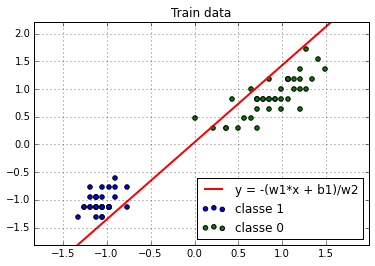

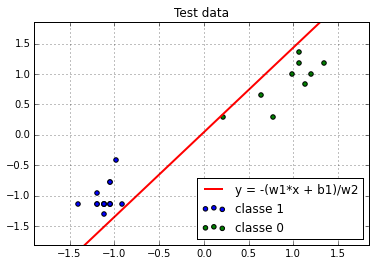

L'erreur de test est de  0.0 %


In [3]:
# Créer et entrainer le modele
model = LinearRegression(mu, max_iter)
model.train(train_set)
model.plot_function(train_set, 'Train data')

# Obtenir les classes prédites sur l'ensemble de test
predictions = model.compute_predictions(test_inputs)

# Convertir les sorties en classe. On prend le signe.
classes_pred = predictions > 0.5

# Mesurer la performance.
err = 1.0 - np.mean(test_labels==classes_pred)

model.plot_function(test_set, 'Test data')
print "L'erreur de test est de ", 100.0 * err,"%"

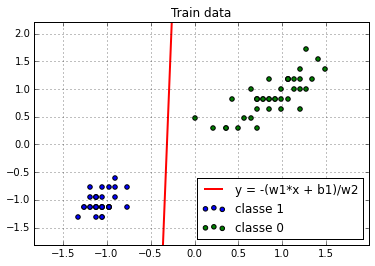

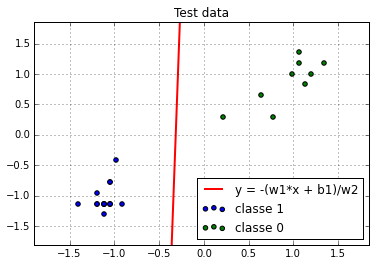

L'erreur de test est de  0.0 %


In [4]:
model = SigmoidCrossEntropy(mu, max_iter)
model.train(train_set)
model.plot_function(train_set, 'Train data')

# Obtenir les classes prédites sur l'ensemble de test
predictions = model.compute_predictions(test_inputs)

# Convertir les sorties en classe. On prend le signe.
classes_pred = predictions > 0.5

# Mesurer la performance.
err = 1.0 - np.mean(test_labels==classes_pred)

model.plot_function(test_set, 'Test data')
print "L'erreur de test est de ", 100.0 * err,"%"